In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df_notas = pd.read_csv('./data/lanacion_notas.csv', index_col = 0)
df = pd.read_csv('./data/commentarios_lanacion.csv', index_col = 0)

In [17]:
#Cantidad de notas recopiladas y cantidad de comments totales
df_notas.shape[0], df.shape[0]

(897, 65470)

In [18]:
#cantidad de recopiladas por sección
df_notas.groupby('seccion').count()

,abierta_comentarios,autor,cuerpo,fecha,titulo,url,keywords
seccion,,,,,,,
Deportes,151,75,151,151,151,151,151
Economía,146,84,146,146,146,146,146
El Mundo,150,34,150,150,150,150,150
Espectáculos,150,51,150,150,150,150,150
Política,150,70,150,150,150,150,150
Sociedad,150,57,150,150,150,150,150


In [19]:
#dimensiones de cada dataset
df_notas.columns

Index(['abierta_comentarios', 'autor', 'cuerpo', 'fecha', 'seccion', 'titulo',
       'url', 'keywords'],
      dtype='object')

In [20]:
df.columns

Index(['es_respuesta', 'fecha', 'likes', 'nota_id', 'respuestas', 'texto',
       'url', 'usuario', 'autor', 'seccion', 'titulo', 'severe_toxicity',
       'toxicity'],
      dtype='object')

In [21]:
df_notas.autor.unique()

array(['Andrés Eliceche', nan, 'Franco Tossi', 'Claudio Mauri',
       'Javier Blanco', 'Sofía Diamante', 'Silvia Stang',
       'Alberto Armendáriz', 'Silvia Pisani', 'Julia Montesoro',
       'Rafael Mathus Ruiz', 'Gabriela Origlia ', 'Fabiola Czubaj',
       'Daniela Chueke Perles', 'Nora Bär', 'Juan Patricio Balbi Vignolo',
       'Sebastián Torok', 'Fernando Vergara', 'Paula Urien',
       'Elisabetta Piqué', 'Natalia Trzenko', 'Hernán Cappiello',
       'Darío Palavecino', 'Víctor Pombinho Soares', 'Pablo Mannino',
       '\r\r\r\n\r\r\r\n', 'Alejandro Casar González',
       'María Julieta Rumi', 'Andrés Krom', 'Marcelo Stiletano',
       'Cecilia Martínez', 'Laura Chertkoff', 'Santiago Dapelo',
       'Iván Ruiz', 'Gabriel Di Nicola', 'Pablo Ricardi',
       "Julia D'Arrisso", 'Francisco Jueguen', 'Mariana Reinke',
       'Charlotte Graham-McLay', 'Joaquín Vismara',
       'Virginia Chacon Dorr', 'Rocío García', 'Silvina Ajmat',
       'Leonardo Scannone', 'Román Iucht', 'Agust

In [22]:
#Cantidad de notas firmadas
df_notas.autor.notnull().sum()

371

In [23]:
#promedio toxicity notas firmadas contra anonimas.

#df = df.merge(df_notas[['autor_y','titulo']], how ='left', on = 'titulo')
df['firmada'] = df.autor.notnull()
df.groupby('firmada').mean().toxicity

firmada
False    0.259407
True     0.247381
Name: toxicity, dtype: float64

In [29]:
#promedio toxicity por genero de autor
autores = pd.read_csv('./data/autores_lanacion.csv', index_col = 0)
df.merge(autores, how ='left', on = 'autor').groupby('genero').mean()

,es_respuesta,likes,nota_id,respuestas,severe_toxicity,toxicity,firmada
genero,,,,,,,
female,0.579140,3.093028,559.219426,0.896780,0.197297,0.242742,1.0
male,0.601004,2.636702,454.244927,0.922745,0.196715,0.248794,1.0


In [7]:
#cantidad de comentarios por sección (y cantidad de notas firmadas)
df.groupby('seccion').count()['texto']

seccion
Deportes         3154
Economía        13804
El Mundo         6144
Espectáculos      707
Política        33372
Sociedad         8289
Name: texto, dtype: int64

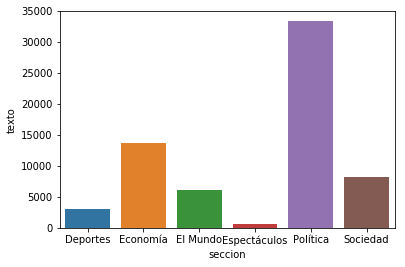

In [8]:
sns.barplot(df.groupby('seccion').count().index, df.groupby('seccion').count().texto)

In [9]:
#promedio de comentarios por sección
df.groupby('titulo').count().merge(df_notas, how = 'left', on = 'titulo').groupby('seccion_y').mean().texto

seccion_y
Deportes         25.823529
Economía        118.806723
El Mundo         50.377049
Espectáculos      8.416667
Política        245.544118
Sociedad         81.301724
Name: texto, dtype: float64

In [10]:
#promedio de toxicidad por sección
df.groupby('seccion').mean().toxicity

seccion
Deportes        0.216971
Economía        0.235532
El Mundo        0.275944
Espectáculos    0.217524
Política        0.261806
Sociedad        0.255870
Name: toxicity, dtype: float64

In [11]:
#promedio de toxicidad severa por sección
df.groupby('seccion').mean().severe_toxicity

seccion
Deportes        0.169038
Economía        0.185474
El Mundo        0.248397
Espectáculos    0.170498
Política        0.208101
Sociedad        0.217044
Name: severe_toxicity, dtype: float64

In [12]:
#cantidad comentarios con más de 500 caracteres
df.texto = df.texto.apply(lambda x : x.replace('\r','').replace('\n',''))
df['caracteres'] = df.texto.apply(len)
df.loc[df.caracteres > 500].shape[0]

1246

In [13]:
#cantidad de comentarios 500 caracteres sin espacio
df['caracteresSE'] = df.texto.apply(lambda x: len(x) - x.count(' '))
df.loc[df.caracteresSE > 500].shape[0]

773

In [14]:
#porcentaje de comentarios "es_respuesta" por sección
df.groupby('seccion').mean().es_respuesta *100

seccion
Deportes        45.561192
Economía        61.873370
El Mundo        58.707682
Espectáculos    21.499293
Política        55.375764
Sociedad        56.593075
Name: es_respuesta, dtype: float64

In [15]:
#porcentaje de categorias
import glosariosRe

In [16]:
import re
misoginos = df.loc[df.texto.str.contains(glosariosRe.misoginos, flags = re.IGNORECASE, na = False)]
racistas = df.loc[df.texto.str.contains(glosariosRe.racistas, flags = re.IGNORECASE, na = False)]
xenofobos = df.loc[df.texto.str.contains(glosariosRe.xenofobos, flags = re.IGNORECASE, na = False)]
ideologicos = df.loc[df.texto.str.contains(glosariosRe.ideologicos, flags = re.IGNORECASE, na = False)]
violentos = df.loc[df.texto.str.contains(glosariosRe.violentos, flags = re.IGNORECASE, na = False)]
homofobicos = df.loc[df.texto.str.contains(glosariosRe.homofobicos, flags = re.IGNORECASE, na = False)]
periodistas = df.loc[df.texto.str.contains(glosariosRe.periodistas, flags = re.IGNORECASE, na = False)]

/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/pablo/anaconda3/lib/python3.6/site-packa

In [17]:
import numpy as np
def porcentajes(df):
    return (df.seccion.value_counts()/df.seccion.value_counts().sum()*100).astype(int)
def graficar(df):
    plt.ylim(0, 62)
    sns.barplot(porcentajes(df).index, porcentajes(df).values)

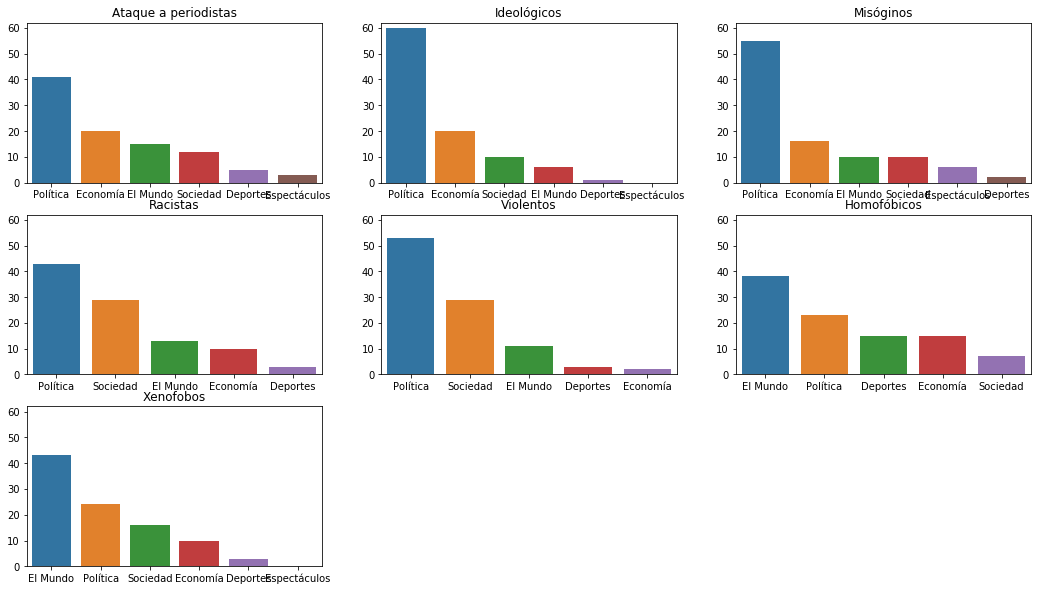

In [18]:
plt.figure(figsize=(18,10))
plt.subplot(331)
plt.title('Ataque a periodistas')
graficar(periodistas)
plt.subplot(332)
plt.title('Ideológicos')
graficar(ideologicos)
plt.subplot(333)
plt.title('Misóginos')
graficar(misoginos)
plt.subplot(334)
plt.title('Racistas')
graficar(racistas);
plt.subplot(335)
plt.title('Violentos')
graficar(violentos);
plt.subplot(336)
plt.title('Homofóbicos')
graficar(homofobicos);
plt.subplot(337)
plt.title('Xenofobos')
graficar(xenofobos);

In [19]:
porcentajes(misoginos)

Política        55
Economía        16
El Mundo        10
Sociedad        10
Espectáculos     6
Deportes         2
Name: seccion, dtype: int64

In [20]:
misoginos.shape[0]/df.shape[0]*100

0.07484343974339393

In [21]:
racistas.shape[0]/df.shape[0] *100

0.145104628073927

In [22]:
violentos.shape[0]/df.shape[0] *100

0.134412708110585

In [23]:
homofobicos.shape[0]/df.shape[0] *100

0.01985642278906369

In [24]:
xenofobos.shape[0]/df.shape[0] *100

0.2016190621658775

In [25]:
ideologicos.shape[0]/df.shape[0] *100

1.2708110585000763

In [26]:
periodistas.shape[0]/df.shape[0] *100

0.6812280433786467

In [27]:
#misoginos.sort_values(by = 'toxicity', ascending= False).to_csv('./data/misoginos_lanacion.csv')
#racistas.sort_values(by = 'toxicity', ascending= False).to_csv('./data/racistas_lanacion.csv')
#xenofobos.sort_values(by = 'toxicity', ascending= False).to_csv('./data/xenofobos_lanacion.csv')
#ideologicos.sort_values(by = 'toxicity', ascending= False).to_csv('./data/ideologicos_lanacion.csv')
#violentos.sort_values(by = 'toxicity', ascending= False).to_csv('./data/violentos_lanacion.csv')
#homofobicos.sort_values(by = 'toxicity', ascending= False).to_csv('./data/homofobicos_lanacion.csv')
#periodistas.sort_values(by = 'toxicity', ascending= False).to_csv('./data/periodistas_lanacion.csv')

Quedaría: 
-Temas con mayor cantidad de comentarios? Cómo se agruparía por temas